In [99]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

acoes = ["BBAS3.SA","BRBI11.SA","BBDC4.SA","ITSA4.SA","TAEE11.SA", "^BVSP"]

dados = yf.download(acoes, period='10y')["Close"]
dados

C:\Users\wesle\AppData\Local\Temp\ipykernel_9296\1590109206.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(acoes, period='10y')["Close"]
[*********************100%***********************]  6 of 6 completed


Ticker,BBAS3.SA,BBDC4.SA,BRBI11.SA,ITSA4.SA,TAEE11.SA,^BVSP
Date,,,,,,
2015-06-10,6.490367,7.719273,NaN,4.127621,7.597311,53876.0
2015-06-11,6.451217,7.708402,NaN,4.066016,7.687117,53689.0
2015-06-12,6.371895,7.556191,NaN,4.056536,7.575759,53348.0
2015-06-15,6.360570,7.526295,NaN,4.099187,7.446445,53138.0
2015-06-16,6.572961,7.694810,NaN,4.236615,7.450037,53702.0
...,...,...,...,...,...,...
2025-06-04,22.350000,16.450001,15.20,10.950000,34.700001,137002.0
2025-06-05,22.240000,15.970000,15.24,10.830000,34.400002,136236.0
2025-06-06,21.709999,15.960000,15.15,10.810000,34.369999,136102.0


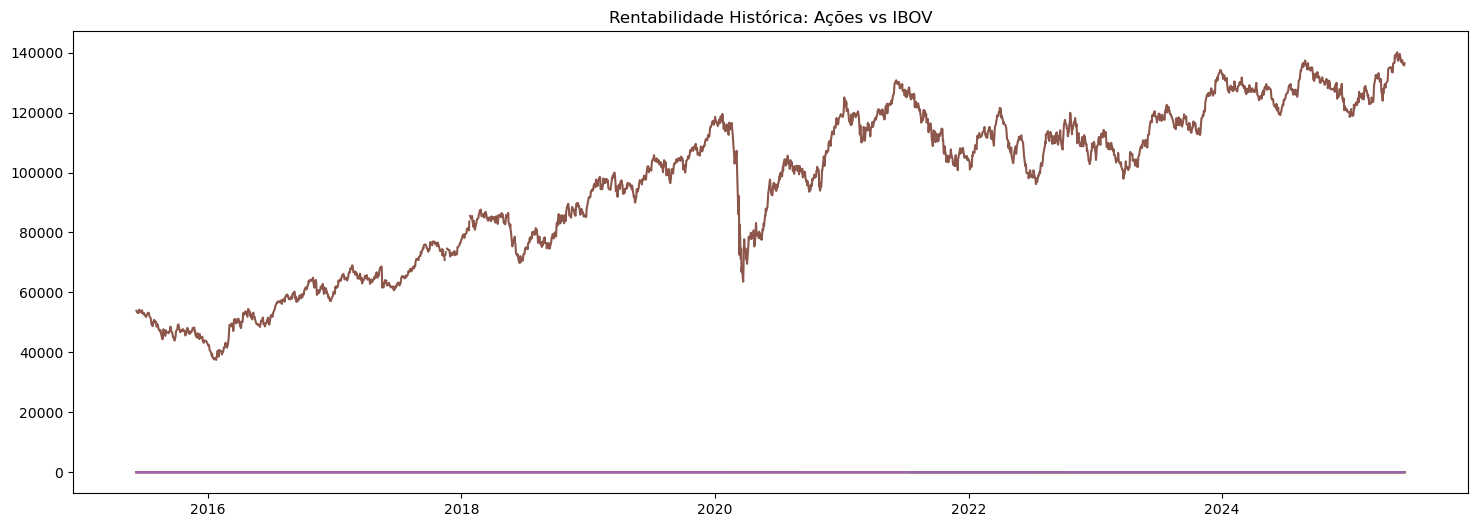

In [100]:
#Plotando Grafico sem Normalizar Valores
plt.figure(figsize=(18,6))
plt.plot(dados)
plt.title("Rentabilidade Histórica: Ações vs IBOV")
plt.show()



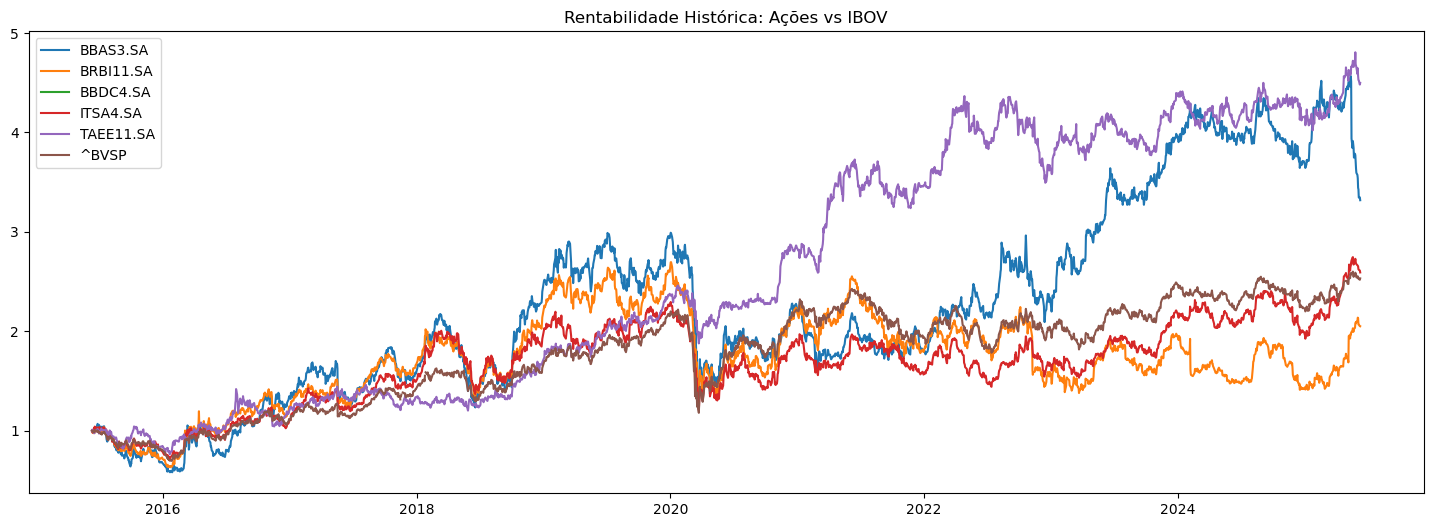

In [101]:
#Normalizando Dados com Estatistica

dados_norm = dados/dados.iloc[0].dropna()


#Grafico normalizado
plt.figure(figsize=(18,6))
plt.plot(dados_norm)
plt.title("Rentabilidade Histórica: Ações vs IBOV")
plt.legend(acoes)
plt.show()

In [102]:
#Retorno Acumulado e Multiplicação de Capital (Dez anos pra cá)

retornos = dados.pct_change().dropna()
retornos

C:\Users\wesle\AppData\Local\Temp\ipykernel_9296\3286541609.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = dados.pct_change().dropna()


Ticker,BBAS3.SA,BBDC4.SA,BRBI11.SA,ITSA4.SA,TAEE11.SA,^BVSP
Date,,,,,,
2021-07-15,-0.015300,-0.015020,0.019512,-0.007923,-0.003153,-0.007313
2021-07-16,-0.012119,0.000000,-0.004785,-0.014197,0.006853,-0.011830
2021-07-19,-0.007549,-0.036517,-0.005288,-0.008101,-0.002094,-0.012425
2021-07-20,0.017750,0.015410,0.042049,0.011797,0.012592,0.008087
2021-07-21,0.009966,0.000411,0.004175,0.006278,0.005959,0.004210
...,...,...,...,...,...,...
2025-06-04,-0.027415,-0.003030,0.000000,-0.002732,-0.016997,-0.003955
2025-06-05,-0.004922,-0.029179,0.002632,-0.010959,-0.008646,-0.005591
2025-06-06,-0.023831,-0.000626,-0.005906,-0.001847,-0.000872,-0.000984


In [107]:
#Calculo de Retorno Acumulado
retorno_acumulado = (1+retornos).cumprod()
retorno_acumulado

Ticker,BBAS3.SA,BBDC4.SA,BRBI11.SA,ITSA4.SA,TAEE11.SA,^BVSP
Date,,,,,,
2021-07-15,0.984700,0.984980,1.019512,0.992077,0.996847,0.992687
2021-07-16,0.972766,0.984980,1.014634,0.977993,1.003678,0.980943
2021-07-19,0.965422,0.949012,1.009268,0.970070,1.001576,0.968756
2021-07-20,0.982558,0.963636,1.051707,0.981514,1.014188,0.976590
2021-07-21,0.992350,0.964032,1.056098,0.987676,1.020231,0.980702
...,...,...,...,...,...,...
2025-06-04,1.754493,0.918122,1.056958,1.429402,1.309791,1.066936
2025-06-05,1.745858,0.891331,1.059740,1.413737,1.298467,1.060970
2025-06-06,1.704252,0.890773,1.053481,1.411126,1.297334,1.059927


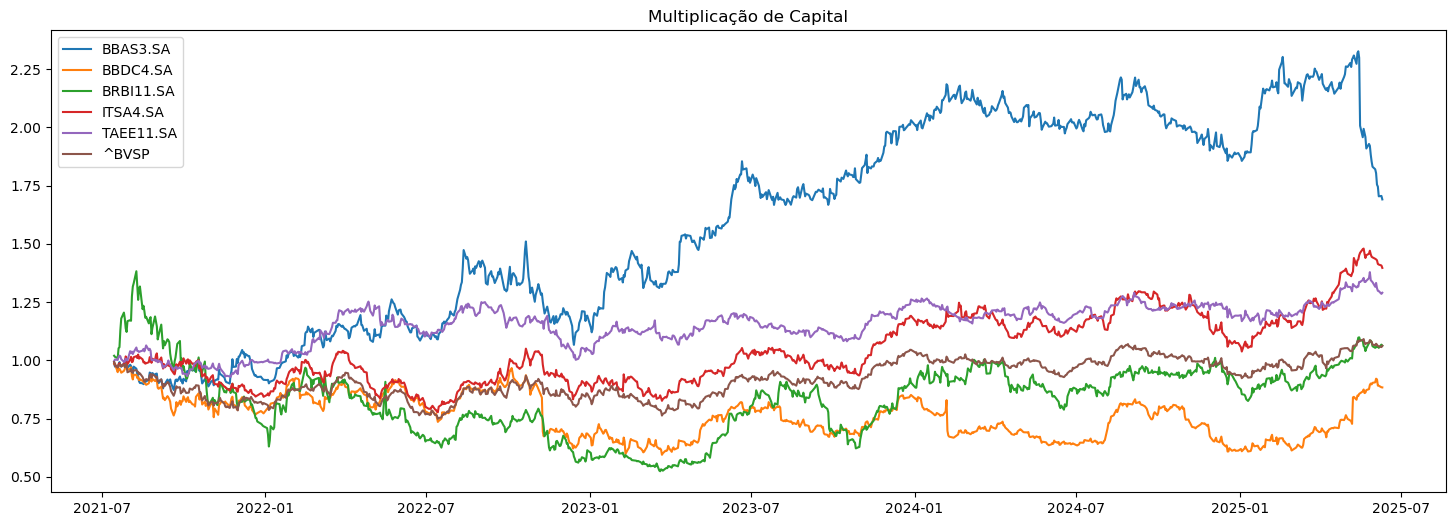

In [106]:
#Plotando Retorno Acumulado

plt.figure(figsize=(18,6))
plt.plot(retorno_acumulado)
plt.title("Multiplicação de Capital")
plt.legend(dados)

Text(0.5, 1.0, 'Volatilidade de Ativos: Ações vs IBOV (Anual)')

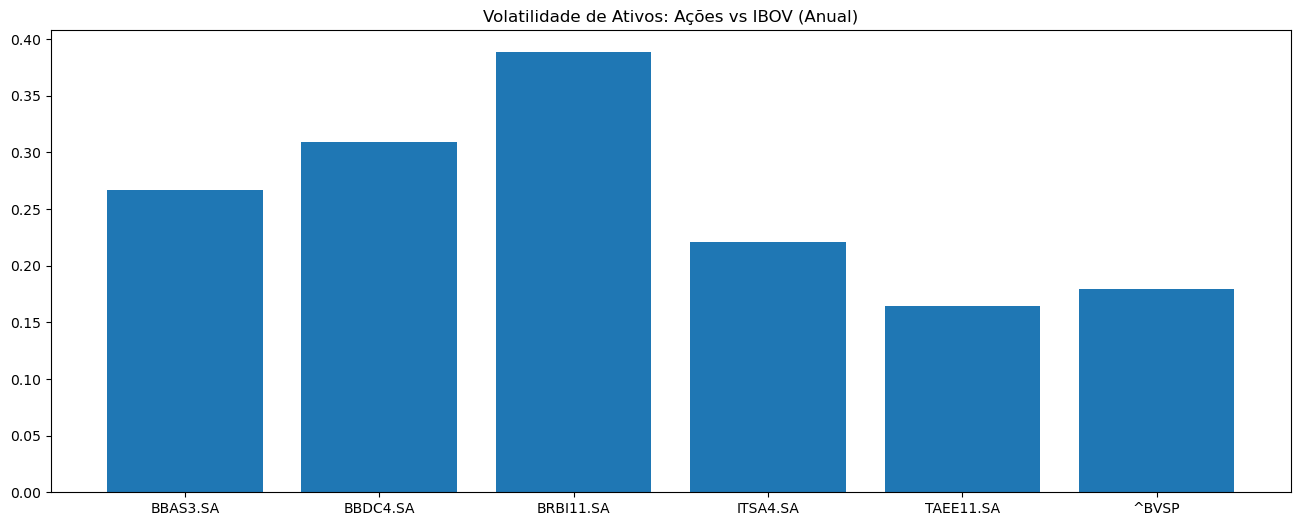

In [104]:
#Analise de Volatilidade Anual

volatilidade = retornos.std() * np.sqrt(252)

plt.figure(figsize=(16,6))
plt.bar(volatilidade.index,volatilidade.values)
plt.title("Volatilidade de Ativos: Ações vs IBOV (Anual)")

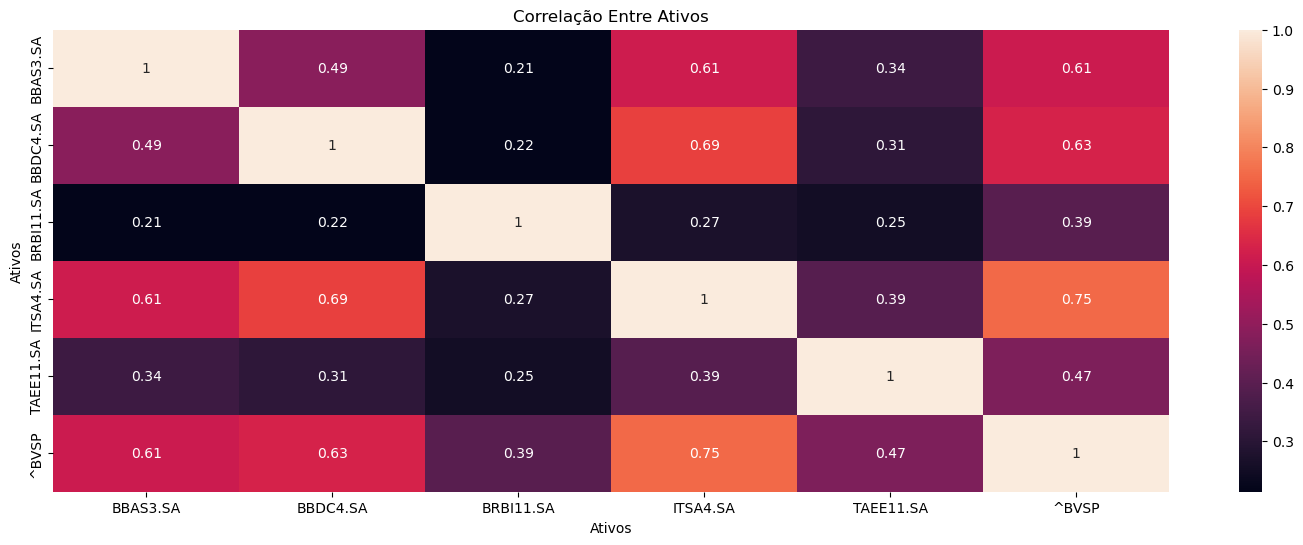

In [105]:
#Analise de Correlação Entre Ativos
#Matrix de Correlação (Mapa de Calor)
plt.figure(figsize=(18,6))
sns.heatmap(retornos.corr(), annot=True)
plt.title("Correlação Entre Ativos")
plt.xlabel("Ativos")
plt.ylabel("Ativos")
plt.show()